## Домашнее задание к занятию от 19.09.2019 г. «Основные статистические тесты и проверка гипотез»
ФИО: Кривова Татьяна Сергеевна

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as sts
import statistics

Таблица Indian liver pations records.

In [3]:
import io
import requests

url="http://yustiks.ru/dataset/indian_liver_patient.csv"
raw_data=pd.read_csv(url)

In [6]:
raw_data.head() # raw_data.shape --> (583, 11)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

In [5]:
# Подробный отчет по датасету
pandas_profiling.ProfileReport(raw_data)

Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [7]:
# Исследование данных. Смотрю, есть ли выбросы:

len(raw_data[ raw_data.Total_Bilirubin.isnull() ]), len(raw_data[ raw_data.Direct_Bilirubin.isnull() ]) 
# отсутствующих значений нет

(0, 0)

In [8]:
# Графики boxplot и hist для параметра Total Bilirubin

from pylab import rcParams
rcParams['figure.figsize'] = 6,6

sns.boxplot(y=raw_data.Total_Bilirubin, color="royalblue")
plt.title('Ящик с усами для параметра Total Bilirubin (sns.boxplot)')

Text(0.5, 1.0, 'Ящик с усами для параметра Total Bilirubin (sns.boxplot)')

(array([395.,  73.,  25.,  16.,  15.,   8.,   3.,   7.,   2.,   6.,   6.,
          3.,   4.,   3.,   3.,   4.,   1.,   2.,   1.,   0.,   3.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.4  ,  1.892,  3.384,  4.876,  6.368,  7.86 ,  9.352, 10.844,
        12.336, 13.828, 15.32 , 16.812, 18.304, 19.796, 21.288, 22.78 ,
        24.272, 25.764, 27.256, 28.748, 30.24 , 31.732, 33.224, 34.716,
        36.208, 37.7  , 39.192, 40.684, 42.176, 43.668, 45.16 , 46.652,
        48.144, 49.636, 51.128, 52.62 , 54.112, 55.604, 57.096, 58.588,
        60.08 , 61.572, 63.064, 64.556, 66.048, 67.54 , 69.032, 70.524,
        72.016, 73.508, 75.   ]),
 <a list of 50 Patch objects>)

Text(0.5, 1.0, 'Частотный график для параметра Total_Bilirubin (plt.hist)')

Text(0.5, 0, 'Total_Bilirubin_values')

Text(0, 0.5, 'Frequency')

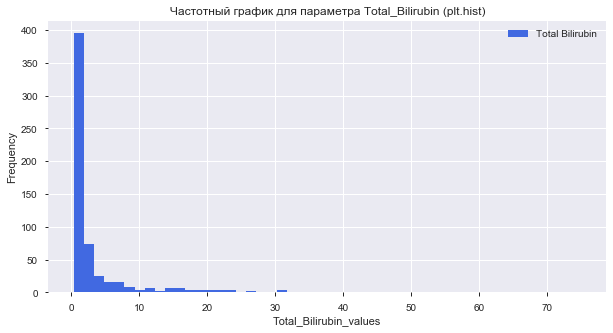

In [9]:
rcParams['figure.figsize'] = 10,5
plt.hist(raw_data.Total_Bilirubin, bins=50, color="royalblue", label='Total Bilirubin')

plt.title('Частотный график для параметра Total_Bilirubin (plt.hist)')
plt.grid(True)
plt.xlabel('Total_Bilirubin_values')
plt.ylabel('Frequency')
plt.legend()

In [10]:
raw_data.Total_Bilirubin.describe()
# Cчитаю значение Q3 + 3*(Q3 - Q1) для определения выбросов. 
# Значения > 8 для параметра Total Bilirubin являются экстремальными выбросами.

count    583.000000
mean       3.298799
std        6.209522
min        0.400000
25%        0.800000
50%        1.000000
75%        2.600000
max       75.000000
Name: Total_Bilirubin, dtype: float64

In [11]:
# Графики boxplot и hist для параметра Direct Bilirubin

rcParams['figure.figsize'] = 6,6
sns.boxplot(y=raw_data.Direct_Bilirubin, color="palevioletred")
plt.title('Ящик с усами для параметра Direct Bilirubin (sns.boxplot)')

Text(0.5, 1.0, 'Ящик с усами для параметра Direct Bilirubin (sns.boxplot)')

(array([329.,  69.,  37.,  36.,  10.,  12.,   8.,  12.,   5.,   6.,   5.,
          3.,   4.,   2.,   1.,   3.,   1.,   2.,   1.,   4.,   2.,   4.,
          5.,   3.,   0.,   2.,   1.,   1.,   2.,   3.,   1.,   2.,   1.,
          0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([ 0.1  ,  0.492,  0.884,  1.276,  1.668,  2.06 ,  2.452,  2.844,
         3.236,  3.628,  4.02 ,  4.412,  4.804,  5.196,  5.588,  5.98 ,
         6.372,  6.764,  7.156,  7.548,  7.94 ,  8.332,  8.724,  9.116,
         9.508,  9.9  , 10.292, 10.684, 11.076, 11.468, 11.86 , 12.252,
        12.644, 13.036, 13.428, 13.82 , 14.212, 14.604, 14.996, 15.388,
        15.78 , 16.172, 16.564, 16.956, 17.348, 17.74 , 18.132, 18.524,
        18.916, 19.308, 19.7  ]),
 <a list of 50 Patch objects>)

Text(0.5, 1.0, 'Частотный график для параметра Direct_Bilirubin (plt.hist)')

Text(0.5, 0, 'Direct_Bilirubin_values')

Text(0, 0.5, 'Frequency')

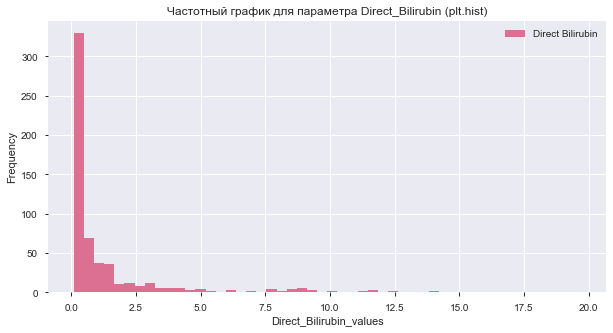

In [12]:
rcParams['figure.figsize'] = 10,5
plt.hist(raw_data.Direct_Bilirubin, bins=50, color="palevioletred", label='Direct Bilirubin')

plt.title('Частотный график для параметра Direct_Bilirubin (plt.hist)')
plt.grid(True)
plt.xlabel('Direct_Bilirubin_values')
plt.ylabel('Frequency')
plt.legend()

In [13]:
raw_data.Direct_Bilirubin.describe()
# Cчитаю значение Q3 + 3*(Q3 - Q1) для определения выбросов. 
# Значения > 4,6 для параметра Direct Bilirubin являются экстремальными выбросами.

count    583.000000
mean       1.486106
std        2.808498
min        0.100000
25%        0.200000
50%        0.300000
75%        1.300000
max       19.700000
Name: Direct_Bilirubin, dtype: float64

Text(0.5, 1.0, 'Точечный график зависимости двух выборок Direct Bilirubin и Total Bilirubin (plt.scatter)')

Text(0.5, 0, 'Direct Bilirubin')

Text(0, 0.5, 'Total Bilirubin')

(0, 20)

(0, 80)

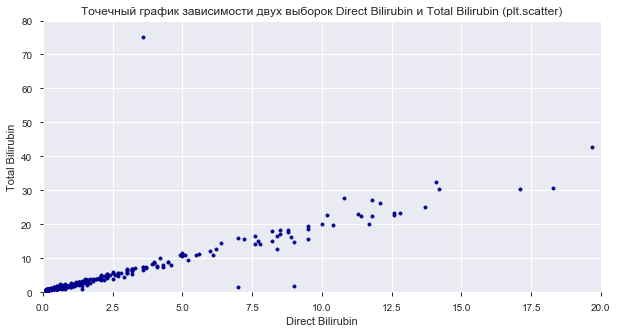

In [14]:
plt.scatter(raw_data.Direct_Bilirubin, raw_data.Total_Bilirubin, color="darkblue", marker=".")
# Вывод: выбросы есть

plt.title('Точечный график зависимости двух выборок Direct Bilirubin и Total Bilirubin (plt.scatter)')
plt.xlabel('Direct Bilirubin')
plt.ylabel('Total Bilirubin')
plt.grid(True)

plt.xlim(0,20)
plt.ylim(0,80)

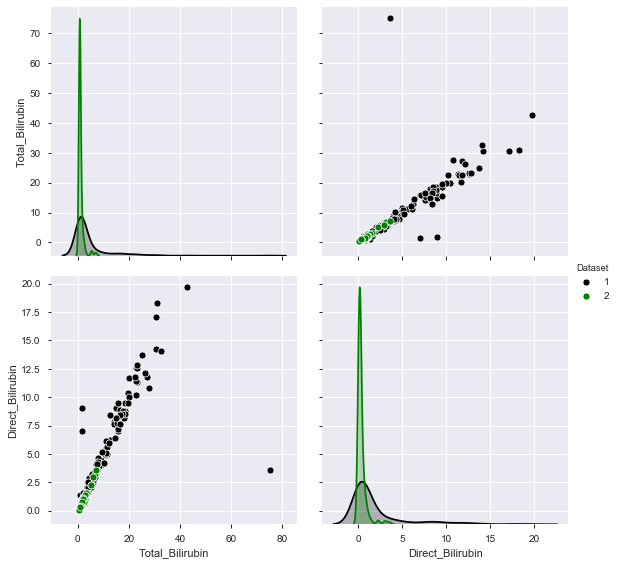

In [15]:
# Смотрим, что представляют собой данные в разрезе категориального параметра Dataset
sns.pairplot(raw_data,\
             vars=["Total_Bilirubin", "Direct_Bilirubin"],\
             hue='Dataset', palette={1:'black', 2:'green'}, size=4)

In [16]:
print(f'Коэффициент Пирсона (сырые данные): {round(np.corrcoef(raw_data.Direct_Bilirubin, raw_data.Total_Bilirubin)[0,1], 3)}')

Коэффициент Пирсона (сырые данные): 0.875


In [17]:
# Выбросы:
raw_data[raw_data.Total_Bilirubin >= 30]
raw_data[raw_data.Total_Bilirubin >= 30].index

raw_data[raw_data.Total_Bilirubin < 10][raw_data.Direct_Bilirubin > 6]
raw_data[raw_data.Total_Bilirubin < 10][raw_data.Direct_Bilirubin > 6].index

Age Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
166   55   Male             75.0               3.6                   332   
259   42   Male             30.5              14.2                   285   
504   32   Male             30.5              17.1                   218   
505   32   Male             32.6              14.1                   219   
531   40   Male             30.8              18.3                   285   
559   26   Male             42.8              19.7                   390   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
166                        40                          66             6.2   
259                        65                         130             5.2   
504                        39                          79             5.5   
505                        95                         235             5.8   
531                       110                         186             7.9   
559                        75                         138             7.5   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
166      2.5                         0.6        1  
259      2.1                         0.6        1  
504      2.7                         0.9        1  
505      3.1                         1.1        1  
531      2.7                         0.5        1  
559      2.6                         0.5        1

Int64Index([166, 259, 504, 505, 531, 559], dtype='int64')

Age Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
246   55   Male              1.8               9.0                   272   
261   33   Male              1.5               7.0                   505   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
246                        22                          79             6.1   
261                       205                         140             7.5   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
246      2.7                         0.7        1  
261      3.9                         1.0        1

Int64Index([246, 261], dtype='int64')

In [18]:
# Исключаю выбросы:
df = raw_data.drop(raw_data.index[[166, 259, 504, 505, 531, 559, 246, 261]]) # df.shape --> (575, 11)

In [19]:
print(f'Коэффициент Пирсона (выбросы исключены): {round(np.corrcoef(df.Direct_Bilirubin, df.Total_Bilirubin)[0,1], 3)}')

Коэффициент Пирсона (выбросы исключены): 0.992


In [20]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) # Масштабирование
np_scaled = min_max_scaler.fit_transform(df[['Direct_Bilirubin', 'Total_Bilirubin']])
df_norm = pd.DataFrame(np_scaled)

df_norm.columns = ['Direct_Bilirubin_norm', 'Total_Bilirubin_norm']

Text(0.5, 1.0, 'Точечный график зависимости двух выборок Direct Bilirubin_norm и Total Bilirubin_norm (sns.regplot)')

Text(0.5, 0, 'Direct Bilirubin')

Text(0, 0.5, 'Total Bilirubin')

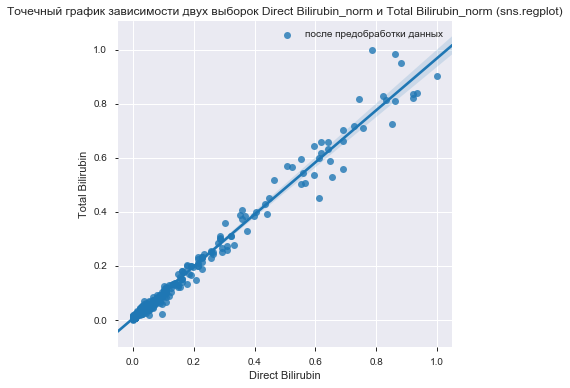

In [21]:
# Смотрим как изменилась выборка после предобработки данных и масштабирования

rcParams['figure.figsize'] = 6,6
sns.regplot(x=df_norm['Direct_Bilirubin_norm'], y=df_norm['Total_Bilirubin_norm'], data=df_norm, fit_reg=True, label='после предобработки данных')

plt.title('Точечный график зависимости двух выборок Direct Bilirubin_norm и Total Bilirubin_norm (sns.regplot)')
plt.xlabel('Direct Bilirubin')
plt.ylabel('Total Bilirubin')
plt.grid(True)
plt.legend()

In [22]:
from sklearn.linear_model import LinearRegression

X = df_norm['Direct_Bilirubin_norm']
Y = df_norm['Total_Bilirubin_norm']

model = LinearRegression()
result = model.fit(np.array(X).reshape(-1,1), Y)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.005302502246086915
slope: [0.96293096]


In [23]:
rcParams['figure.figsize'] = 6,6

plt.xlabel('Direct_Bilirubin_norm')
plt.ylabel('Total_Bilirubin_norm')
plt.title('Линейная регрессия: y = 0.963*x + 0.005')

x = np.linspace(0, 1, 200)
y = model.coef_*x + model.intercept_

plt.plot(x,y)

plt.plot(X, Y, 'r.')
plt.show()

Text(0.5, 0, 'Direct_Bilirubin_norm')

Text(0, 0.5, 'Total_Bilirubin_norm')

Text(0.5, 1.0, 'Линейная регрессия: y = 0.963*x + 0.005')

In [24]:
# Посмотрим предсказание модели для элементов из таблицы с выбранными индексами и сравним с табличным значением
# Вывод: получилась вполне адекватная модель 

index_list = [1, 7, 8, 12, 15, 49, 55, 90, 94, 155, 105, 119, 367, 485, 578, 582]

controls = df[df.index.isin(index_list)][['Direct_Bilirubin', 'Total_Bilirubin']]

columns_scaled = min_max_scaler.fit_transform(controls[['Direct_Bilirubin', 'Total_Bilirubin']])
new_columns = pd.DataFrame(columns_scaled)
new_columns.columns = ['x_norm', 'y_norm']

result = controls.join(new_columns.set_index([index_list]), how='left')

result['predict_values'] = model.predict(np.array([result.x_norm]).reshape(-1, 1))

result['model_error'] = round(result['predict_values'] - result['y_norm'], 3)
result

Direct_Bilirubin  Total_Bilirubin    x_norm    y_norm  predict_values  \
1                 5.5             10.9  0.620690  0.581006        0.602984   
7                 0.3              0.9  0.022989  0.022346        0.027439   
8                 0.3              0.9  0.022989  0.022346        0.027439   
12                0.3              0.9  0.022989  0.022346        0.027439   
15                0.1              0.6  0.000000  0.005587        0.005303   
49                8.8             18.4  1.000000  1.000000        0.968233   
55                4.5              8.9  0.505747  0.469274        0.492302   
90                2.8              5.7  0.310345  0.290503        0.304143   
94                2.4              5.2  0.264368  0.262570        0.259870   
105               2.3              5.3  0.931034  0.977654        0.901824   
119               8.2             18.0  0.448276  0.458101        0.436961   
155               4.0              8.7  0.252874  0.268156        0.248802   
367               1.0              2.2  0.103448  0.094972        0.104916   
485               3.2              6.7  0.356322  0.346369        0.348416   
578               0.1              0.5  0.000000  0.000000        0.005303   
582               0.3              1.0  0.022989  0.027933        0.027439   

     model_error  
1          0.022  
7          0.005  
8          0.005  
12         0.005  
15        -0.000  
49        -0.032  
55         0.023  
90         0.014  
94        -0.003  
105       -0.076  
119       -0.021  
155       -0.019  
367        0.010  
485        0.002  
578        0.005  
582       -0.000

In [25]:
rcParams['figure.figsize'] = 6,6
plt.scatter(result['predict_values'], result['y_norm'], color="black", marker="*", label='Предсказание модели')
plt.scatter(result['predict_values'], result['model_error'], color="red", marker="o", label='Ошибка')

plt.title('Точечный график зависимости двух выборок predict_values и y_norm (plt.scatter)')
plt.xlabel('predict_values')
plt.ylabel('y_norm')
plt.grid(True)
plt.legend()

Text(0.5, 1.0, 'Точечный график зависимости двух выборок predict_values и y_norm (plt.scatter)')

Text(0.5, 0, 'predict_values')

Text(0, 0.5, 'y_norm')

Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

In [26]:
# Смотрим, что представляет собой целевая метрика Dataset

rcParams['figure.figsize'] = 10,5
plt.hist(raw_data.Dataset, bins=50, color="royalblue", label='Dataset')

plt.title('Частотный график для параметра Dataset (plt.hist)')
plt.grid(True)
plt.xlabel('Dataset_values')
plt.ylabel('Frequency')
plt.legend()

# Вывод: переменная Dataset является категориальной и имеет дискретное распределение, Бернулли. 
# В этом случае модель линейной регрессии является неадекватной, т.к. это задача классификации.

(array([416.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 167.]),
 array([1.  , 1.02, 1.04, 1.06, 1.08, 1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 ,
        1.22, 1.24, 1.26, 1.28, 1.3 , 1.32, 1.34, 1.36, 1.38, 1.4 , 1.42,
        1.44, 1.46, 1.48, 1.5 , 1.52, 1.54, 1.56, 1.58, 1.6 , 1.62, 1.64,
        1.66, 1.68, 1.7 , 1.72, 1.74, 1.76, 1.78, 1.8 , 1.82, 1.84, 1.86,
        1.88, 1.9 , 1.92, 1.94, 1.96, 1.98, 2.  ]),
 <a list of 50 Patch objects>)

Text(0.5, 1.0, 'Частотный график для параметра Dataset (plt.hist)')

Text(0.5, 0, 'Dataset_values')

Text(0, 0.5, 'Frequency')

In [27]:
# Категориальную переменную Gender перевожу в столбцы One-hot-encoding.

new_df = raw_data[['Age', 'Gender']]

new_df['Gender_f'] = np.where(new_df.Gender == 'Female', 1, 0)
new_df['Gender_m'] = np.where(new_df.Gender == 'Male', 1, 0)

data = raw_data.join(new_df.drop(columns=['Age', 'Gender']), how='left')
data.head() # data.shape --> (583, 13)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  Gender_f  Gender_m  
0      3.3                        0.90        1         1         0  
1      3.2                        0.74        1         0         1  
2      3.3                        0.89        1         0         1  
3      3.4                        1.00        1         0         1  
4      2.4                        0.40        1         0         1

In [28]:
rcParams['figure.figsize'] = 10,10
corr_matrix = data.corr()
corr_matrix.style.set_precision(3) # матрица корреляций

sns.heatmap(corr_matrix, annot=True,linewidths=.5, square=True, cmap="RdYlGn")

Text(0.5, 1.0, 'Ящик с усами для параметра Age (sns.boxplot)')

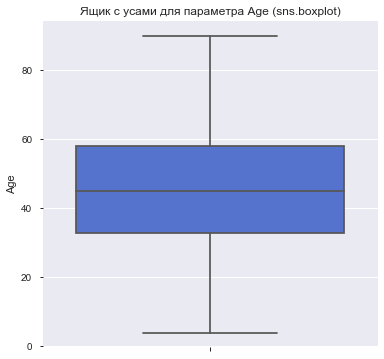

In [29]:
# В качестве переменных возьмем Direct_Bilirubin и Age. Наблюдение: между ними корреляция меньше, чем с целевой метрикой Dataset.
# Графики boxplot и hist для параметра Age

rcParams['figure.figsize'] = 6,6

sns.boxplot(y=data.Age, color="royalblue")
plt.title('Ящик с усами для параметра Age (sns.boxplot)')

In [30]:
rcParams['figure.figsize'] = 10,5
plt.hist(data.Age, bins=50, color="royalblue", label='Age')

plt.title('Частотный график для параметра Age (plt.hist)')
plt.grid(True)
plt.xlabel('Age_values')
plt.ylabel('Frequency')
plt.legend()

(array([ 2.,  3.,  1.,  1.,  3.,  6.,  4.,  5., 13., 10.,  9.,  8., 19.,
        14.,  7., 18., 35.,  8., 23., 30., 23.,  5., 25., 28., 16., 26.,
        34., 17.,  6., 26., 11., 14., 34., 14.,  8., 17., 13.,  6.,  9.,
         8.,  6., 14.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.]),
 array([ 4.  ,  5.72,  7.44,  9.16, 10.88, 12.6 , 14.32, 16.04, 17.76,
        19.48, 21.2 , 22.92, 24.64, 26.36, 28.08, 29.8 , 31.52, 33.24,
        34.96, 36.68, 38.4 , 40.12, 41.84, 43.56, 45.28, 47.  , 48.72,
        50.44, 52.16, 53.88, 55.6 , 57.32, 59.04, 60.76, 62.48, 64.2 ,
        65.92, 67.64, 69.36, 71.08, 72.8 , 74.52, 76.24, 77.96, 79.68,
        81.4 , 83.12, 84.84, 86.56, 88.28, 90.  ]),
 <a list of 50 Patch objects>)

Text(0.5, 1.0, 'Частотный график для параметра Age (plt.hist)')

Text(0.5, 0, 'Age_values')

Text(0, 0.5, 'Frequency')

In [31]:
data.Age.describe()

count    583.000000
mean      44.746141
std       16.189833
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: Age, dtype: float64

In [32]:
# Исключаю выбросы Direct_Bilirubin:
data = data.drop(data.index[[166, 259, 504, 505, 531, 559, 246, 261]]) # data.shape --> (575, 13)

In [33]:
print(f'Коэффициент Пирсона (выбросы исключены):\n\
Direct_Bilirubin и Age: {round(np.corrcoef(data.Direct_Bilirubin, data.Age)[0,1], 3)}\n\
Direct_Bilirubin и Dataset: {round(np.corrcoef(data.Direct_Bilirubin, data.Dataset)[0,1], 3)}\n\
Age и Dataset: {round(np.corrcoef(data.Age, data.Dataset)[0,1], 3)}')

Коэффициент Пирсона (выбросы исключены):
Direct_Bilirubin и Age: 0.044
Direct_Bilirubin и Dataset: -0.248
Age и Dataset: -0.141


Text(0.5, 1.0, 'Точечный график зависимости двух выборок Age и Direct Bilirubin (plt.scatter)')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Direct Bilirubin')

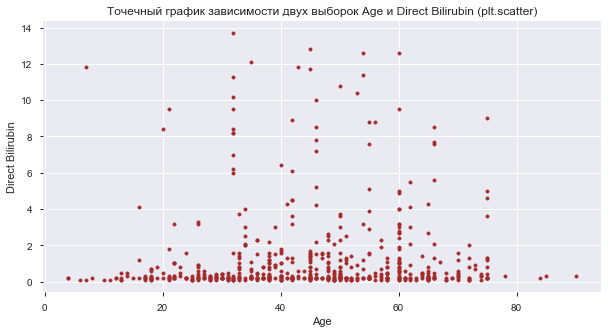

In [34]:
plt.scatter(data.Age, data.Direct_Bilirubin, color="brown", marker=".")

plt.title('Точечный график зависимости двух выборок Age и Direct Bilirubin (plt.scatter)')
plt.xlabel('Age')
plt.ylabel('Direct Bilirubin')
plt.grid(True)

#Вывод: нет линейной зависимости

In [35]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) # Масштабирование
np_scaled = min_max_scaler.fit_transform(data[['Age', 'Direct_Bilirubin', 'Dataset']])
data_norm = pd.DataFrame(np_scaled)

data_norm.columns = ['Age_norm', 'Direct_Bilirubin_norm', 'Dataset_norm']

In [36]:
data_norm.head(15)

data_norm[data_norm.Dataset_norm == 0].shape, data_norm[data_norm.Dataset_norm == 1].shape

d_2_smpl = data_norm[data_norm.Dataset_norm == 1].sample(160) # делаем наборы данных одинакового размера по кол-ву больных и здоровых
d_1_smpl = data_norm[data_norm.Dataset_norm == 0].sample(160)

d_2_smpl.shape, d_1_smpl.shape

Age_norm  Direct_Bilirubin_norm  Dataset_norm
0   0.709302               0.000000           0.0
1   0.674419               0.397059           0.0
2   0.674419               0.294118           0.0
3   0.627907               0.022059           0.0
4   0.790698               0.139706           0.0
5   0.488372               0.044118           0.0
6   0.255814               0.007353           0.0
7   0.290698               0.014706           0.0
8   0.151163               0.014706           1.0
9   0.593023               0.007353           0.0
10  0.616279               0.000000           0.0
11  0.790698               0.088235           0.0
12  0.697674               0.014706           1.0
13  0.813953               0.022059           0.0
14  0.662791               0.007353           0.0

((408, 3), (167, 3))

((160, 3), (160, 3))

In [37]:
model_data = pd.concat([d_1_smpl, d_2_smpl], ignore_index=True)

model_data.shape
model_data.head()

(320, 3)

Age_norm  Direct_Bilirubin_norm  Dataset_norm
0  0.488372               0.375000           0.0
1  0.697674               0.007353           0.0
2  0.523256               0.007353           0.0
3  0.383721               0.007353           0.0
4  0.313953               0.000000           0.0

In [38]:
target = model_data['Dataset_norm']
db = model_data['Direct_Bilirubin_norm']
age = model_data['Age_norm']

X = np.vstack([np.array(db), np.array(age)]).T
print(f'X - это двумерная матрица, где колонки - это Direct_Bilirubin_norm и Age_norm:\n\n{X[:5]}\n')

y = np.array(target)

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)

print('intercept:', model.intercept_)
print('slope:', model.coef_)


X - это двумерная матрица, где колонки - это Direct_Bilirubin_norm и Age_norm:

[[0.375      0.48837209]
 [0.00735294 0.69767442]
 [0.00735294 0.52325581]
 [0.00735294 0.38372093]
 [0.         0.31395349]]

intercept: 0.7400825811670647
slope: [-0.99726679 -0.36242258]


In [39]:
# Посмотрим предсказание модели для элементов из таблицы с выбранными индексами и сравним с табличным значением

index_list = [1, 7, 8, 12, 15, 49, 55, 90, 94, 155, 105, 119, 367, 485, 578, 582]
controls = data[data.index.isin(index_list)][['Direct_Bilirubin', 'Age', 'Dataset']]

columns_scaled = min_max_scaler.fit_transform(controls[['Direct_Bilirubin', 'Age', 'Dataset']])
new_columns = pd.DataFrame(columns_scaled)
new_columns.columns = ['db_norm', 'age_norm','target_norm']

result = controls.join(new_columns.set_index([index_list]), how='left')

result['predict_values'] = model.predict(np.vstack([np.array(result.db_norm), np.array(result.age_norm)]).T)

result['model_error'] = round(result['predict_values'] - result['target_norm'], 3)

result

Direct_Bilirubin  Age  Dataset   db_norm  age_norm  target_norm  \
1                 5.5   62        1  0.620690  0.957447          0.0   
7                 0.3   29        1  0.022989  0.255319          0.0   
8                 0.3   17        2  0.022989  0.000000          1.0   
12                0.3   64        2  0.022989  1.000000          1.0   
15                0.1   25        2  0.000000  0.170213          1.0   
49                8.8   55        1  1.000000  0.808511          0.0   
55                4.5   42        1  0.505747  0.531915          0.0   
90                2.8   60        1  0.310345  0.914894          0.0   
94                2.4   60        1  0.264368  0.914894          0.0   
105               2.3   36        2  0.931034  0.319149          0.0   
119               8.2   32        1  0.448276  0.361702          0.0   
155               4.0   34        1  0.252874  0.404255          1.0   
367               1.0   60        2  0.103448  0.914894          1.0   
485               3.2   22        1  0.356322  0.106383          0.0   
578               0.1   60        2  0.000000  0.914894          1.0   
582               0.3   38        2  0.022989  0.446809          1.0   

     predict_values  model_error  
1         -0.225911       -0.226  
7          0.624623        0.625  
8          0.717157       -0.283  
12         0.354734       -0.645  
15         0.678394       -0.322  
49        -0.550207       -0.550  
55         0.042940        0.043  
90         0.099008        0.099  
94         0.144859        0.145  
105       -0.304074       -0.304  
119        0.161943        0.162  
155        0.341389       -0.659  
367        0.305339       -0.695  
485        0.346179        0.346  
578        0.408504       -0.591  
582        0.555223       -0.445

Text(0.5, 1.0, 'Точечный график зависимости двух выборок predict_values и target_norm (plt.scatter)')

Text(0.5, 0, 'predict_values')

Text(0, 0.5, 'target_norm')

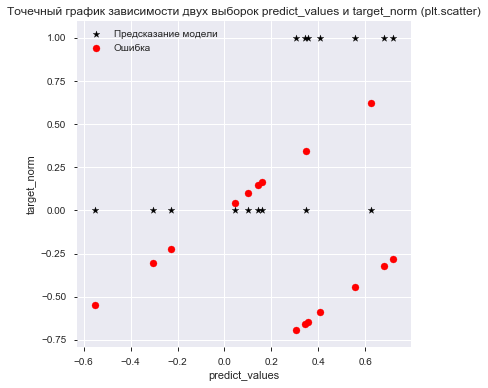

In [40]:
rcParams['figure.figsize'] = 6,6
plt.scatter(result['predict_values'], result['target_norm'], color="black", marker="*", label='Предсказание модели')
plt.scatter(result['predict_values'], result['model_error'], color="red", marker="o", label='Ошибка')

plt.title('Точечный график зависимости двух выборок predict_values и target_norm (plt.scatter)')
plt.xlabel('predict_values')
plt.ylabel('target_norm')
plt.grid(True)
plt.legend()

Посчитать квартили для всех колонок. 

In [41]:
raw_data.describe()[4:7]

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
25%  33.0              0.8               0.2                 175.5   
50%  45.0              1.0               0.3                 208.0   
75%  58.0              2.6               1.3                 298.0   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
25%                      23.0                        25.0             5.8   
50%                      35.0                        42.0             6.6   
75%                      60.5                        87.0             7.2   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
25%      2.6                        0.70      1.0  
50%      3.1                        0.93      1.0  
75%      3.8                        1.10      2.0

Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [42]:
younger_Dataset = raw_data[raw_data.Age < 50]['Dataset']
older_Dataset = raw_data[raw_data.Age >= 50]['Dataset']

sns.distplot(younger_Dataset)
sns.distplot(older_Dataset)
plt.title('Плотность вероятности распределения Dataset')

plt.legend(['Возраст до 50 лет', 'Возраст после 50 лет'])
plt.show()

Text(0.5, 1.0, 'Плотность вероятности распределения Dataset')

In [43]:
younger_Dataset.describe() # mean 1.317280, Q2 1.000000

count    353.000000
mean       1.317280
std        0.466078
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Dataset, dtype: float64

In [44]:
older_Dataset.describe() # mean 1.239130, Q2 1.000000

count    230.000000
mean       1.239130
std        0.427483
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: Dataset, dtype: float64

In [45]:
younger_Dataset.value_counts()

1    241
2    112
Name: Dataset, dtype: int64

In [46]:
older_Dataset.value_counts()

1    175
2     55
Name: Dataset, dtype: int64

In [47]:
print(f'Значение медианы для колонки Dataset:\n\tВыборка younger_Dataset {statistics.median(younger_Dataset)}\n\
        Выборка older_Dataset {statistics.median(older_Dataset)}')

Значение медианы для колонки Dataset:
	Выборка younger_Dataset 1
        Выборка older_Dataset 1.0


In [48]:
# переменная Dataset является категориальной и имеет дискретное распределение, Бернулли.

# Размер выборки younger_Dataset: 353. Переменная Dataset принимает значения 1 (241 раз, вероятность 0,68) и 2 (112 раз, вероятность 0,32)
# Поэтому среднее значение = 1,317
# Медиана = 1

# Размер выборки older_Dataset: 230. Переменная Dataset принимает значения 1 (175 раз, вероятность ) и 2 (55 раз, вероятность )
# Поэтому среднее значение = 1,239
# Медиана = 1

# Q2(медиана) отличается от среднего значения по определению и по формуле расчета


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [49]:
# H0: У больных людей (среднее) значение параметра Total_Bilirubin не отличается от генеральной совокупности

ill_tbil = data[data.Dataset == 1]['Total_Bilirubin']
general_tbil = data['Total_Bilirubin']

# len(ill_tbil), len(general_tbil) # смотрю размеры --> (408, 575)
# statistics.variance(ill_tbil), statistics.pvariance(general_tbil) # смотрю дисперсию --> (28.615692959001784, 21.83613749716446)
# ill_tbil.mean(), general_tbil.mean() # смотрю средние значения --> (3.644362745098039, 2.917739130434783)

In [50]:
sts.ttest_1samp(ill_tbil, general_tbil.mean())

# Вывод: т.к. pvalue < 0.05, нулевая гипотеза неверна, т.е. выборка не похожа на генеральную совокупность

Ttest_1sampResult(statistic=2.743705260121497, pvalue=0.006343635368143485)

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [51]:
# H0: Больные и здоровые люди имеют одинаковое (среднее) значение параметра Total_Bilirubin

ills = data[data.Dataset == 1]['Total_Bilirubin']
norm = data[data.Dataset == 2]['Total_Bilirubin']

len(ills), len(norm) # проверяю размеры

(408, 167)

In [52]:
ills_smpl = ills.sample(165) # делаю наборы данных одинакового размера
norm_smpl = norm.sample(165)

In [53]:
statistics.variance(ills_smpl), statistics.variance(norm_smpl) # проверяю дисперсию, различается

(26.428457501847745, 1.0193178122690318)

In [54]:
sts.ttest_ind(ills_smpl, norm_smpl, equal_var=False) # Welch's t-test

# Вывод: т.к. pvalue < 0.05, нулевая гипотеза неверна, т.е. данные группы не имеют схожести

Ttest_indResult(statistic=5.882879525955705, pvalue=1.9776711680369897e-08)

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [55]:
first_group = data[data.Age >= 1][data.Age < 30]['Dataset']
second_group = data[data.Age >= 30][data.Age < 55]['Dataset']
third_group = data[data.Age >= 55]['Dataset']

# len(first_group), len(second_group), len(third_group) # смотрю размеры --> (104, 297, 174)

In [56]:
statistics.variance(first_group), statistics.variance(second_group), statistics.variance(third_group)  # проверяю дисперсию, различается

(0.25093353248693057, 0.1893939393939394, 0.19002059663809714)

In [57]:
sts.f_oneway(first_group, second_group, third_group)

F_onewayResult(statistic=9.261879303922546, pvalue=0.0001099954937560398)

In [58]:
sts.kruskal(first_group, second_group, third_group)

# Вывод: т.к. pvalue < 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп с разными возрастами

KruskalResult(statistic=18.00543548996153, pvalue=0.00012307486305935362)

In [59]:
# Графически на гистограмме
sns.distplot(first_group)
sns.distplot(second_group)
sns.distplot(third_group)

plt.title('Плотность вероятности распределения Dataset')
plt.legend(['от 1 до 30 лет', 'от 30 лет до 55', 'более 55 лет'])
plt.show()

Text(0.5, 1.0, 'Плотность вероятности распределения Dataset')

In [60]:
first_group.describe() # mean и std первой группы отличается от двух других 

second_group.describe()

third_group.describe()

count    104.000000
mean       1.461538
std        0.500933
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Dataset, dtype: float64

count    297.000000
mean       1.252525
std        0.435194
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Dataset, dtype: float64

count    174.000000
mean       1.252874
std        0.435914
min        1.000000
25%        1.000000
50%        1.000000
75%        1.750000
max        2.000000
Name: Dataset, dtype: float64